#  CAO Points Notebook

The Jupyter notebook is in three section

1. Setup
    - 1.1 Imports
    - 1.2 Set Time
    - 1.3 CAO URL Availability Function
    - 1.4 CAO HTML Save functions
    - 1.5 CAO file save function
    - 1.6 CAO Webpage links
    - 1.7 CAO Points URL
2. Import CAO Points into pandas
    - 2.1 Load 2021 Points
    - 2.2 Load 2020 Points
    - 2.3 Load 2019 Points
    - 2.4 Load 2018 Points
    - 2.5 Merge all DataFrames
    - 2.6 Replace and convert values
3. CAO Points comparison comparison, plots and other visualisations
    - 3.1 Pandas Describe with Observation
    - 3.2 Matplotlib Histogram with Observation
    - 3.3 Top N results with Pandas
    - 3.4 Final Dataframe with Observations using Seaborn mobule
4. Reference
5. End of file analysis
6. Other Learning outcomes
    - 6.1 Pandas import on HTML Data
    - 6.2 Pandas import on PDF Data
    - 6.3 Zip files

# 1. Set up

- 1.1 Imports
- 1.2 Set Time
- 1.3 CAO URL Availability Function
- 1.4 CAO HTML Save functions
- 1.5 CAO file save function
- 1.6 CAO Webpage links
- 1.7 CAO Points URL

## 1.1 Imports
A requirments.txt is included for a user who may run this analysis using Binder or try at home. 

In [592]:
# Regular expressions 
import re
# Convenient HTTP requests
import requests as rq
# Dates and times
import datetime as dt
# Import numpy module
import numpy as np
# For downloading.
import urllib.request as urlrq
import urllib.parse as urlpar
# Import tabula to read table in pdf
import tabula as tb
# Import mathplotlib
import matplotlib.pyplot as plt
# Import time
import time
# import pandas
import pandas as pd 
# import seaborn
import seaborn as sns
# import Zipfile
from zipfile import ZipFile
# import warnings
import warnings
warnings.filterwarnings("ignore")

## 1.2 Set Time

The time is set at the beginning of the Notebook, to standardise when the files are saved and assist when the data is collected. This allows the option to review any changes that may happen when reading the data from the CAO website.

In [593]:
########################################################################
# Set Datetime Globally for referencing
########################################################################
# Get the current date and time
now = dt.datetime.now()

# format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

print(nowstr)

20211228_182601


## 1.3 CAO URL Availability Function
A function to test if the CAO URLs are available against a 404 request.  HTTP 404, 404 not found, 404, 404 error, page not found or file not found error message is a hypertext transfer protocol (HTTP) standard response code, in computer network communications, to indicate that the browser was able to communicate with a given server, but the server could not find what was requested. The error may also be used when a server does not wish to disclose whether it has the requested information [2]

In [594]:
########################################################################
# Function to test URLs
# https://pytutorial.com/check-url-is-reachable
########################################################################
def url_checker(url):
	try:
		#Get Url
		resp = rq.get(url)
		# if the request succeeds
		if resp.status_code == 404:
			print(f"{url}: is not reachable")
		else:
			print(f"{url}: is reachable")
			

	#Exception
	except rq.exceptions.RequestException as e:
        # print URL with Errs
		raise SystemExit(print(f"{url}: is Not reachable \nErr: {e}"))

## 1.4 CAO HTML Save function

The HTML Save function is a repeatable step and is used to save a copy of each of the HTML pages from 2018 - 2020. It includes a check connection response of 200  as this is a standard response for successful HTTP requests. The actual response will depend on the request method used. In a GET request, the response will contain an entity corresponding to the requested resource. In a POST request, the response will contain an entity describing or containing the result of the action. [3] This allows the user to review any connection issues or changes made on the CAO website

The filename includes the nowstr from the Set Time

In [595]:
########################################################################
# Function to save CAO Webpages 
########################################################################

def htmlcopy(url):
    # Fetch the CAO points URL
    resp = rq.get(url)
    # Check connection '<Response [200]>' means OK
    if resp.status_code == 200:
        print(f"{url}: is reachable")

        path = 'data/' + nowstr + '_CAO_Webpage_' + url[-4:] + '.html'
        print(str(path))

        # Save the original html file.
        with open(path, 'w') as f:
            f.write(resp.text)
    else:
        print(f"{url}: is not reachable")
    

## 1.5 CAO file save function

The save file function is a repeatable step and is used to save a copy of each of the files from 2018 - 2020.


In [596]:
########################################################################
# Function to save files
########################################################################

def caosavefile(url):
    split = urlpar.urlsplit(url)
    path = 'data/' + nowstr + '_CAO_file_' + split.path.split("/")[-1]
    print(str(path))
    urlrq.urlretrieve(url, path)

## 1.6 CAO Webpage links

All the current URL's for CAO 2018 - 2020, using a for loop to copy the HTML pages using the **1.4 CAO HTML Save function**

Output shows if url is available and the file save name and it's location

In [597]:
########################################################################
# CAO web pages
# https://www.cao.ie/index.php?page=points&p=2018
# https://www.cao.ie/index.php?page=points&p=2019
# https://www.cao.ie/index.php?page=points&p=2020
# https://www.cao.ie/index.php?page=points&p=2021
########################################################################

html2018 = 'https://www.cao.ie/index.php?page=points&p=2018'
html2019 = 'https://www.cao.ie/index.php?page=points&p=2019'
html2020 = 'https://www.cao.ie/index.php?page=points&p=2020'
html2021 = 'https://www.cao.ie/index.php?page=points&p=2021'

caopointshtml = [html2018,html2019,html2020,html2021]

for url in caopointshtml:
    htmlcopy(url)

https://www.cao.ie/index.php?page=points&p=2018: is reachable
data/20211228_182601_CAO_Webpage_2018.html
https://www.cao.ie/index.php?page=points&p=2019: is reachable
data/20211228_182601_CAO_Webpage_2019.html
https://www.cao.ie/index.php?page=points&p=2020: is reachable
data/20211228_182601_CAO_Webpage_2020.html
https://www.cao.ie/index.php?page=points&p=2021: is reachable
data/20211228_182601_CAO_Webpage_2021.html


## 1.7 CAO Points URL

The saved HTML is inspected to extract the links with required data and is listed in the function below. 

The CAO point files links are copied from the saved HTML files. In late November 2021, the CAO changed the link for the 2021 point and consequently how the data is read by pandas

- http://www2.cao.ie/points/l8.php
Change to
- http://www2.cao.ie/points/CAOPointsCharts2021.xlsx

The assessment is updated to read the new xlsx file. To illustrate a working knowledge of the HTML, a copy of the code is for reference below in the section Original 2021 CAO HTML

All the current URL's for CAO points 2018 - 2020 use the functions **1.3 CAO URL Availability Function** and **1.5 CAO file save function** in a for loop to retrieve the information from those URLs.

Output of the functions show if url is available and the file save name and it's location.

In [598]:
########################################################################
# CAO points files
# http://www2.cao.ie/points/lvl8_18.pdf
# http://www2.cao.ie/points/lvl76_18.pdf
# http://www2.cao.ie/points/lvl8_19.pdf
# http://www2.cao.ie/points/lvl76_19.pdf
# http://www2.cao.ie/points/CAOPointsCharts2020.xlsx
# http://www2.cao.ie/points/CAOPointsCharts2021.xlsx
########################################################################
CAO2021 = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'
CAO2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'
CAO2019_8 = 'http://www2.cao.ie/points/lvl8_19.pdf'
CAO2019_76 = 'http://www2.cao.ie/points/lvl76_19.pdf'
CAO2018_8 = 'http://www2.cao.ie/points/lvl8_18.pdf'
CAO2018_76 = 'http://www2.cao.ie/points/lvl76_18.pdf'

########################################################################
# List of URL 
# Use function to test if available
########################################################################
caopointslist = [CAO2021,CAO2020,CAO2019_8, CAO2019_76,CAO2018_8, CAO2018_76]

for url in caopointslist:
    url_checker(url)
    caosavefile(url)
    

http://www2.cao.ie/points/CAOPointsCharts2021.xlsx: is reachable
data/20211228_182601_CAO_file_CAOPointsCharts2021.xlsx
http://www2.cao.ie/points/CAOPointsCharts2020.xlsx: is reachable
data/20211228_182601_CAO_file_CAOPointsCharts2020.xlsx
http://www2.cao.ie/points/lvl8_19.pdf: is reachable
data/20211228_182601_CAO_file_lvl8_19.pdf
http://www2.cao.ie/points/lvl76_19.pdf: is reachable
data/20211228_182601_CAO_file_lvl76_19.pdf
http://www2.cao.ie/points/lvl8_18.pdf: is reachable
data/20211228_182601_CAO_file_lvl8_18.pdf
http://www2.cao.ie/points/lvl76_18.pdf: is reachable
data/20211228_182601_CAO_file_lvl76_18.pdf


# 2. Import CAO Points into pandas

- 2.1 Load 2021 Points
- 2.2 Load 2021 Points
- 2.3 Load 2021 Points
- 2.4 Load 2021 Points
- 2.5 Merge all DataFrames
- 2.6 Replace and convert values

## 2.1 Load 2021 Points
In late November 2021, the CAO changed the link for the 2021 point and consequently how the data is read by pandas

- http://www2.cao.ie/points/l8.php

Change to

- http://www2.cao.ie/points/CAOPointsCharts2021.xlsx

The assessment is updated to read the new CAO points xlsx file. To illustrate a working knowledge reading HTML and importing into pandas, a copy of the code is for reference below in the section titled **Original 2021 CAO HTML**

A decision was made to use the excel sheet as it resulted in a more complete dataset

### Load the spreadsheet using pandas

Opening the 2021 xlsx file from the CAO website, to inspect the data, the following was observed:
- 1463 rows
- 15 columns
- The first 11 rows contained information about the file

Pandas have a function to load a Excel directly into a data frame. Using the associated [panda's read excel documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)  the first 11 rows are skipped. The data frame was set to DF2021  only selecting 8 columns, the columns are renamed for analyses later and a sample output to screen

Resulting in 1451 rows × 8 columns in the DF2021 DataFrame.

### Missing Data
Pandas isna().sum() was used to returns the number of missing values in each column [5] this is used to assist with which data to select for later analysis

    Code               0
    Title              0
    21_R1 Points      35
    21_R2 Points    1067
    21_EOS            29
    21_Mid            18
    Category           0
    College            0
    dtype: int64

In [599]:
# Download and parse the excel spreadsheet.
# 1451 rows × 15 columns
# Skip first 11 Rows
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df = pd.read_excel(CAO2021, skiprows=11)

DF2021 = df[['Course Code','Course Title','R1 Points','R2 Points ','EOS Points','EOS Midpoints', 'CATEGORY (ISCED Description)', 'HEI']] 

DF2021 = DF2021.rename(columns={'Course Code': 'Code', 'Course Title': 'Title', 'R1 Points': '21_R1 Points', 'R2 Points ': '21_R2 Points', 'EOS Points': '21_EOS',
        'EOS Midpoints': '21_Mid', 'CATEGORY (ISCED Description)': 'Category', 'HEI': 'College'})

DF2021

,Code,Title,21_R1 Points,21_R2 Points,21_EOS,21_Mid,Category,College
0,AL605,Music and Instrument Technology,211,NaN,211,319,Engineering and engineering trades,Athlone Institute of Technology
1,AL630,Pharmacy Technician,308,NaN,308,409,Health,Athlone Institute of Technology
2,AL631,Dental Nursing,311,NaN,311,400,Health,Athlone Institute of Technology
3,AL632,Applied Science,297,NaN,297,454,Biological and related sciences,Athlone Institute of Technology
4,AL650,Business,AQA,AQA,AQA,351,Business and administration,Athlone Institute of Technology
...,...,...,...,...,...,...,...,...
1446,WD211,Creative Computing,270,NaN,270,392,Information and Communication Technologies (ICTs),Waterford Institute of Technology
1447,WD212,Recreation and Sport Management,262,NaN,262,304,Personal services,Waterford Institute of Technology
1448,WD230,Mechanical and Manufacturing Engineering,230,230,230,361,Engineering and engineering trades,Waterford Institute of Technology
1449,WD231,Early Childhood Care and Education,266,NaN,266,366,Welfare,Waterford Institute of Technology


In [600]:
# Returns the number of missing values in each column
DF2021.isna().sum()

Code               0
Title              0
21_R1 Points      35
21_R2 Points    1067
21_EOS            29
21_Mid            18
Category           0
College            0
dtype: int64

## 2.2 Load 2020 Points

### Load the spreadsheet using pandas

Opening the 2021 xlsx file from the CAO website, to inspect the data, the following was observed:
- 1475 rows
- 23 columns
- The first 10 rows contained information about the file

Pandas have a function to load a Excel directly into a data frame. Using the associated [panda's read excel documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) the first 10 rows are skipped. The data frame was set to DF2020 only selecting 8 columns, the columns are renamed for analyses later and a sample output to screen. 

Resulting in 1464 rows × 8 columns in the DF2020 DataFrame

### Missing Data
Pandas isna().sum() was used to returns the number of missing values in each column [5] this is used to assist with which data to select for later analysis.

    Code               0
    Title              0
    20_R1 Points      27
    20_R2 Points    1131
    20_EOS            16
    20_Mid            27
    Category           0
    College            0
    dtype: int64

In [601]:
# Download and parse the excel spreadsheet.
# 1464 rows × 23 columns
# Skip first 10 Rows
df = pd.read_excel(CAO2020, skiprows=10)

DF2020 = df[['COURSE CODE2','COURSE TITLE','R1 POINTS','R2 POINTS','EOS','EOS Mid-point','CATEGORY (i.e.ISCED description)', 'HEI']] 

DF2020 = DF2020.rename(columns={'COURSE CODE2': 'Code', 'COURSE TITLE': 'Title', 'R1 POINTS': '20_R1 Points', 'R2 POINTS': '20_R2 Points', 'EOS': '20_EOS', 
    'EOS Mid-point': '20_Mid', 'CATEGORY (i.e.ISCED description)': 'Category', 'HEI': 'College'})

DF2020

,Code,Title,20_R1 Points,20_R2 Points,20_EOS,20_Mid,Category,College
0,AC120,International Business,209,NaN,209,280,Business and administration,American College
1,AC137,Liberal Arts,252,NaN,252,270,Humanities (except languages),American College
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,NaN,#+matric,#+matric,Arts,National College of Art and Design
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,NaN,#+matric,#+matric,Arts,National College of Art and Design
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,NaN,#+matric,#+matric,Arts,National College of Art and Design
...,...,...,...,...,...,...,...,...
1459,WD208,Manufacturing Engineering,188,NaN,188,339,Manufacturing and processing,Waterford Institute of Technology
1460,WD210,Software Systems Development,279,NaN,279,337,Information and Communication Technologies (ICTs),Waterford Institute of Technology
1461,WD211,Creative Computing,271,NaN,271,318,Information and Communication Technologies (ICTs),Waterford Institute of Technology
1462,WD212,Recreation and Sport Management,270,NaN,270,349,Personal services,Waterford Institute of Technology


In [602]:
# Returns the number of missing values in each column
DF2020.isna().sum()

Code               0
Title              0
20_R1 Points      27
20_R2 Points    1131
20_EOS            16
20_Mid            27
Category           0
College            0
dtype: int64

## 2.3 Load 2019 Points

The assessment was to investigate at importing pdf tables via the tabula-py module. This method was tried and caused an error with the 2019 data specifically with lvl8_19.pdf on Page 16 and caused an error splitting the page into 3 separate tables. This caused an error when merging pandas data frame and the choice of losing 52 rows of valid data. To illustrate a working knowledge of reading a PDF, a copy of the code is for reference below. **Read pdf with tabula-py CAO points 2019 level 8**

Data copied from pdf to excel = 930 rows × 4 columns
Data imported via tabula-py = 965 rows × 4 columns

### Load the spreadsheet using pandas

Opening the 2019 pdf files from the CAO website, to inspect the data, the files were opened and copied the required data tables into a text file using excel.
- Two PDF files 
    - CAO2019_8 = 'http://www2.cao.ie/points/lvl8_19.pdf' - 930 rows × 4 columns
    - CAO2019_76 = 'http://www2.cao.ie/points/lvl76_19.pdf' - 461 rows × 4 columns
    - Copy tables
    - Paste to excel
    - Remove all whitespaces [6]
    - Save files as csv
    - Use a for loop to read data into a single DataFrame [7]
- Tabula-py used to import pdf and automate the process of reading data 
    - Tabula caused errors in reading pages shifting tables to multiple values
    - Data copied from pdf to excel = 930 rows × 4 columns
    - Data imported via tabula-py = 965 rows × 4 columns

Pandas have a function to load a csv directly into a data frame. Using the associated [panda's read csv documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) a for loop was used to read the data from both files into a single DataFrame. The data frame was set to DF2019 with 4 columns, the columns are named for analyses later and a sample output to screen

Resulting in 1391 rows × 4 columns in the DF2019 DataFrame.

### Missing Data
Pandas isna().sum() was used to returns the number of missing values in each column [5] this is used to assist with which data to select for later analysis.

    Code       0
    Title      0
    19_EOS    22
    19_Mid    23
    dtype: int64

In [603]:
# Read csvs into 2019 pandas DataFrame
# https://www.geeksforgeeks.org/add-column-names-to-DataFrame-in-pandas/
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://www.kite.com/python/answers/how-to-make-a-single-pandas-DataFrame-from-multiple-%60.csv%60-files-in-python

csvfiles = ['data/lvl8_19.csv', 'data/lvl76_19.csv']

dflist = []

colname = ['Code', 'Title', '19_EOS', '19_Mid']

for filename in csvfiles:
    dflist.append(pd.read_csv(filename, sep=',' , skiprows = 1,header = None, names = colname ))
    
DF2019 = pd.concat(dflist)

DF2019

,Code,Title,19_EOS,19_Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
456,WD188,Applied Health Care,206,339.0
457,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0
458,WD206,Electronic Engineering,191,322.0
459,WD207,Mechanical Engineering,179,330.0


In [604]:
# Returns the number of missing values in each column
DF2019.isna().sum()

Code       0
Title      0
19_EOS    22
19_Mid    23
dtype: int64

## 2.4 Load 2018 Points

### Load the spreadsheet using pandas

Opening the 2018 pdf files from the CAO website, to inspect the data, the files were opened and copied the required data tables into a text file using excel.
- Two PDF files 
    - CAO2018_8 = 'http://www2.cao.ie/points/lvl8_18.pdf' - 914 rows × 4 columns
    - CAO2018_76 = 'http://www2.cao.ie/points/lvl76_18.pdf' - 471 rows × 4 columns
    - Copy tables
    - Paste to excel
    - Remove all whitespaces [6]
    - Save files as csv
    - Use a for loop to read data into a single DataFrame [7]

Pandas have a function to load a csv directly into a data frame. Using the associated [panda's read csv documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) a for loop was used to read the data from both files into a single DataFrame. The data frame was set to DF2019 with 4 columns, the columns are named for analyses later and a sample output to screen

Resulting in 1385 rows × 4 columns in the DF2018 DataFrame.

### Missing Data
Pandas isna().sum() was used to returns the number of missing values in each column [5] this is used to assist with which data to select for later analysis.

    Code       0
    Title      0
    18_EOS    23
    18_Mid    39
    dtype: int64


In [605]:
# Read csvs into 2018 pandas DataFrame

csvfiles = ['data/lvl8_18.csv', 'data/lvl76_18.csv']

dflist = []

colname = ['Code', 'Title', '18_EOS', '18_Mid']

for filename in csvfiles:
    dflist.append(pd.read_csv(filename, sep=',' , skiprows = 1,header = None, names = colname ))
    
DF2018 = pd.concat(dflist)

DF2018

,Code,Title,18_EOS,18_Mid
0,AL801,Software Design Game Development or Cloud Comp...,295,326.0
1,AL810,Quantity Surveying,300,340.0
2,AL820,Mechanical and Polymer Engineering,299,371.0
3,AL830,General Nursing,418,440.0
4,AL832,Psychiatric Nursing,377,388.0
...,...,...,...,...
466,WD205,Molecular Biology with Biopharmaceutical Science,217,398.0
467,WD206,Electronic Engineering,175,330.0
468,WD207,Mechanical Engineering,182,362.0
469,WD208,Manufacturing Engineering,180,298.0


In [606]:
# Returns the number of missing values in each column
DF2018.isna().sum()

Code       0
Title      0
18_EOS    23
18_Mid    39
dtype: int64

## 2.5 Merge all DataFrames

A single Dataframe is required to analyse the data from the CAO a method of one to one is selected which must contain unique values. Experienced users of relational databases like SQL will be familiar with the terminology used to describe join operations between two SQL-table like structures (DataFrame objects). 

Pandas provide various facilities for easily combining DataFrame with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations. The initial work in identifying missing values on each of the DataFrame indicated that Code and Title had no missing values.

A new Dataframe is created with only Code and title, dropping all duplicated in Code creating unique values, with a new column created to get the college code. A review is complete on the new Dataframe and returns back no missing values. 

The New Dataframe **AllCourses** **Code** is set as the index as a **one-to-one** join which must contain unique values.  The set_index is set to the corresponding DF2021, DF2020, DF2019, DF2018 and their subsequent columns creating a single Dataframe.[8] [9]

### Missing Data
Pandas isna().sum() was used to returns the number of missing values in each column [5] this is used to assist with which data to select for later analysis.

    Title              0
    College Code       0
    College          423
    Category         423
    21_R1 Points     458
    21_R2 Points    1499
    21_EOS           452
    21_Mid           441
    20_R1 Points     437
    20_R2 Points    1552
    20_EOS           426
    20_Mid           437
    19_Mid           506
    18_Mid           539
    dtype: int64



In [607]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# Estimate = 1874 indiviual courses codes
# Create new Dataframe with all Code and Title from DF2021, DF2020, DF2019, DF2018


lvl_21 = DF2021[['Code', 'Title']]
lvl_20 = DF2020[['Code', 'Title']]
lvl_19 = DF2019[['Code', 'Title']]
lvl_18 = DF2018[['Code' , 'Title']]

frames = [lvl_21, lvl_20, lvl_19, lvl_18]

Codes = pd.concat(frames)

# Drop all dupicates on Code only and reset the indexes
# New Dataframe which must contain unique values
AllCourses = Codes.drop_duplicates('Code').reset_index(drop=True)

# Add College Code
# https://www.datasciencemadesimple.com/return-first-n-character-from-left-of-column-in-pandas-python/
AllCourses['College Code'] = AllCourses['Code'].str[:2]

AllCourses

,Code,Title,College Code
0,AL605,Music and Instrument Technology,AL
1,AL630,Pharmacy Technician,AL
2,AL631,Dental Nursing,AL
3,AL632,Applied Science,AL
4,AL650,Business,AL
...,...,...,...
1869,TL621,Hotel Operations,TL
1870,TL622,Travel and Tourism Studies,TL
1871,TL720,Travel and Tourism Management,TL
1872,WD040,Building Services Engineering,WD


In [608]:
# Check to see if any missing College code

AllCourses[AllCourses['College Code'].isna()]

,Code,Title,College Code


In [609]:
# Set indexes of Code for df in AllCourses
AllCourses.set_index('Code', inplace=True)

# Join all EOS 
DF2021.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2021[['College', 'Category', '21_R1 Points', '21_R2 Points','21_EOS', '21_Mid']])

DF2020.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2020[['20_R1 Points', '20_R2 Points','20_EOS', '20_Mid']])

DF2019.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2019[['19_Mid']])

DF2018.set_index('Code', inplace=True)

AllCourses = AllCourses.join(DF2018[['18_Mid']])

AllCourses

,Title,College Code,College,Category,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
Code,,,,,,,,,,,,,,
AC120,International Business,AC,American College,Business and administration,294,294,294,352,209,NaN,209,280,269.0,288.0
AC137,Liberal Arts,AC,American College,Humanities (except languages),271,270,270,334,252,NaN,252,270,275.0,298.0
AD101,"First Year Art and Design (Common Entry,portfo...",AD,National College of Art and Design,Arts,554,NaN,554,604,#+matric,NaN,#+matric,#+matric,550.0,NaN
AD102,Graphic Design and Moving Image Design (portfo...,AD,National College of Art and Design,Arts,538,NaN,538,625,#+matric,NaN,#+matric,#+matric,635.0,NaN
AD103,Textile and Surface Design and Jewellery and O...,AD,National College of Art and Design,Arts,505,NaN,505,581,#+matric,NaN,#+matric,#+matric,545.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,WD,Waterford Institute of Technology,Information and Communication Technologies (ICTs),270,NaN,270,392,271,NaN,271,318,322.0,326.0
WD212,Recreation and Sport Management,WD,Waterford Institute of Technology,Personal services,262,NaN,262,304,270,NaN,270,349,311.0,338.0
WD230,Mechanical and Manufacturing Engineering,WD,Waterford Institute of Technology,Engineering and engineering trades,230,230,230,361,253,NaN,253,369,348.0,NaN


In [610]:
# Check for missing values in new DataFrame
AllCourses.isna().sum()

Title              0
College Code       0
College          423
Category         423
21_R1 Points     458
21_R2 Points    1499
21_EOS           452
21_Mid           441
20_R1 Points     437
20_R2 Points    1552
20_EOS           426
20_Mid           437
19_Mid           506
18_Mid           539
dtype: int64

## 2.6 Replace and convert values to numeric

Each of the files provided by the CAO included headers/ information on non-numeric values: 

    Random * = Not all on this points score were offered places
    \# = Test / Interview / Portfolio / Audition
    AQA = All qualified applicants
    avp = Available Places
    v = New competition for available places resulted in a higher points cutoff
    \+matric

To analyse all data requires to be numeric and the following occurred:

    1. Replace all AQA with 100 points as it means that all qualified applicants for a course were offered a place. AQA sometimes suggests that the points of the last qualified applicant being offered a place were less than 100 points [10]
    2. Remove all Special characters [11]
    3. Remove all +matric as the matriculation and English language requirements are the minimum and will be higher for certain courses and in certain institutions. [12]
    4. Replace all blank cells with nan
    5. Set all points columns to numeric [13] and verify



In [611]:
# Replace all AQA with 100
# Replace all # with NAN
# Replace all +matric with NAN
# Replace all blank/empty cells with NAN

AllCourses=AllCourses.replace('AQA','100',regex=True)
AllCourses=AllCourses.replace('\#','',regex=True)
AllCourses=AllCourses.replace('\+matric',np.nan,regex=True)
AllCourses=AllCourses.replace('',np.nan)

AllCourses

,Title,College Code,College,Category,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
Code,,,,,,,,,,,,,,
AC120,International Business,AC,American College,Business and administration,294,294,294,352.0,209,NaN,209,280.0,269.0,288.0
AC137,Liberal Arts,AC,American College,Humanities (except languages),271,270,270,334.0,252,NaN,252,270.0,275.0,298.0
AD101,"First Year Art and Design (Common Entry,portfo...",AD,National College of Art and Design,Arts,554,NaN,554,604.0,NaN,NaN,NaN,NaN,550.0,NaN
AD102,Graphic Design and Moving Image Design (portfo...,AD,National College of Art and Design,Arts,538,NaN,538,625.0,NaN,NaN,NaN,NaN,635.0,NaN
AD103,Textile and Surface Design and Jewellery and O...,AD,National College of Art and Design,Arts,505,NaN,505,581.0,NaN,NaN,NaN,NaN,545.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,WD,Waterford Institute of Technology,Information and Communication Technologies (ICTs),270,NaN,270,392.0,271,NaN,271,318.0,322.0,326.0
WD212,Recreation and Sport Management,WD,Waterford Institute of Technology,Personal services,262,NaN,262,304.0,270,NaN,270,349.0,311.0,338.0
WD230,Mechanical and Manufacturing Engineering,WD,Waterford Institute of Technology,Engineering and engineering trades,230,230,230,361.0,253,NaN,253,369.0,348.0,NaN


In [612]:
# Set all points to numeric 
AllCourses[['21_R1 Points', '21_R2 Points','21_EOS', '21_Mid','20_R1 Points', '20_R2 Points','20_EOS', '20_Mid', '19_Mid', '18_Mid']]= AllCourses[['21_R1 Points', 
        '21_R2 Points','21_EOS', '21_Mid','20_R1 Points', '20_R2 Points','20_EOS', '20_Mid', '19_Mid', '18_Mid']].apply(pd.to_numeric)

In [613]:
# Verify datatypes
AllCourses.dtypes

Title            object
College Code     object
College          object
Category         object
21_R1 Points    float64
21_R2 Points    float64
21_EOS          float64
21_Mid          float64
20_R1 Points    float64
20_R2 Points    float64
20_EOS          float64
20_Mid          float64
19_Mid          float64
18_Mid          float64
dtype: object

# 3. Analyse Data 

- 3.1 Pandas Describe with Observation
- 3.2 Matplotlib Histogram with Observation
- 3.3 Top N results with Pandas
- 3.4 Final Dataframe with Observations using Seaborn mobule

## 3.1 Pandas Describe with Observation

The describe() method computes and displays summary statistics for a Python dataframe. It also operates on dataframe columns and Pandas series objects. []

A simple visual example of how the Pandas describe method calculates summary statistics on a Python dataframe.

So if you have a Pandas dataframe or a Series object, you can use the describe method and it will output statistics like:

    - mean
    - median
    - standard deviation
    - minimum
    - maximum
    - percentiles 25%, 50%, 75%


### Observation 

The Mid point is the points score of the applicant in the middle of a list of offerees placed in points score order [10]

The summary statistics on a the dataframe has shown an increase year on year on the mean, (25%, 50%, 75%) percentiles and max using the mid points from 2018 to 2021. 

In [614]:
AllCourses.describe()

,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
count,1421.000000,385.000000,1427.000000,1442.000000,1431.000000,331.000000,1440.000000,1433.000000,1379.000000,1346.000000
mean,369.548205,346.714286,364.417659,445.355062,346.308176,323.709970,343.549306,426.192603,398.848441,394.086181
std,146.247017,168.662775,146.783898,126.355244,137.271099,147.087916,138.211344,119.953753,124.675577,122.411865
min,57.000000,60.000000,57.000000,0.000000,55.000000,100.000000,55.000000,57.000000,30.000000,56.000000
25%,261.000000,210.000000,260.000000,368.000000,251.000000,202.500000,249.000000,350.000000,321.500000,319.000000
50%,332.000000,311.000000,327.000000,429.000000,311.000000,300.000000,309.000000,398.000000,369.000000,366.000000
75%,477.000000,477.000000,469.500000,520.000000,430.000000,448.500000,422.250000,478.000000,446.000000,444.000000
max,1028.000000,956.000000,1028.000000,1141.000000,1088.000000,768.000000,1088.000000,1088.000000,1073.000000,1045.000000


In [615]:
AllCourses[['21_Mid', '20_Mid', '19_Mid', '18_Mid']].describe()

,21_Mid,20_Mid,19_Mid,18_Mid
count,1442.000000,1433.000000,1379.000000,1346.000000
mean,445.355062,426.192603,398.848441,394.086181
std,126.355244,119.953753,124.675577,122.411865
min,0.000000,57.000000,30.000000,56.000000
25%,368.000000,350.000000,321.500000,319.000000
50%,429.000000,398.000000,369.000000,366.000000
75%,520.000000,478.000000,446.000000,444.000000
max,1141.000000,1088.000000,1073.000000,1045.000000


## 3.2 Matplotlib Histogram with Observation

A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency. [15]

A side by side histogram is displayed to investigate hypotheses of colleges offering courses at higher entry points. 

The First side by side histogram displays the 2018 - 2020 mid point for college courses
The Second side by side histogram overlays the round 1 entry points of 2021

### Observation

The Midpoint is the points score of the applicant in the middle of a list of offerees placed in points score order [10]. The 2021 area in blue shows a decrease in the ranges below 400 points and increase in the ranges above 400

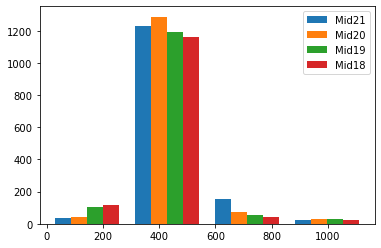

In [616]:
Mid21 = AllCourses['21_Mid']
Mid20 = AllCourses['20_Mid']
Mid19 = AllCourses['19_Mid']
Mid18 = AllCourses['18_Mid']

plt.hist((Mid21, Mid20, Mid19, Mid18), 4, label = ("Mid21", "Mid20", "Mid19", "Mid18"))
plt.legend()

### Observation

The round 1 points of the 2021 and 2020 in a side by side histogram both gave a distribution skewed to the left. 2021 is slightly more skewed to the left as more courses are offered at a higher point range in the 400 to 600 points range. 

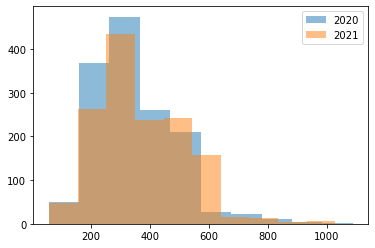

In [617]:
# Create a side by side for Round 1 of 2021 and 2020 data

R121 = AllCourses['21_R1 Points']
R120 = AllCourses['20_R1 Points']

plt.hist(R120, alpha=0.5, label='2020')
plt.hist(R121, alpha=0.5, label='2021')
plt.legend(loc='upper right')

## 3.3 Top N results with Pandas

To reduce the number of data points to investigate the skewed data histograms the following action are completed:

- Top 10 Colleges providers
- Top 5 Courses Categories
- New Dataframe on Points between 400 - 600 points using the [isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) and [between](https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html) pandas function

A histogram to display the Top 10 Colleges that provided the most courses from 2018 - 2021

### Observation
- Technological University Dublin
- Trinity College Dublin
- Galway-Mayo Institute of Technology
- Limerick Institute of Technology
- Institute of Technology, Carlow
- Institute of Technology, Sligo
- Cork Institute of Technology
- Dublin City University
- National University of Ireland, Galway
- Waterford Institute of Technology

([<matplotlib.axis.XTick at 0x1cbf7c26700>,
 [Text(0, 0, 'Technological University Dublin'),
  Text(1, 0, 'Trinity College Dublin'),
  Text(2, 0, 'Galway-Mayo Institute of Technology'),
  Text(3, 0, 'Limerick Institute of Technology'),
  Text(4, 0, 'Institute of Technology, Carlow'),
  Text(5, 0, 'Institute of Technology, Sligo'),
  Text(6, 0, 'Cork Institute of Technology'),
  Text(7, 0, 'Dublin City University'),
  Text(8, 0, 'National University of Ireland, Galway'),
  Text(9, 0, 'Waterford Institute of Technology')])

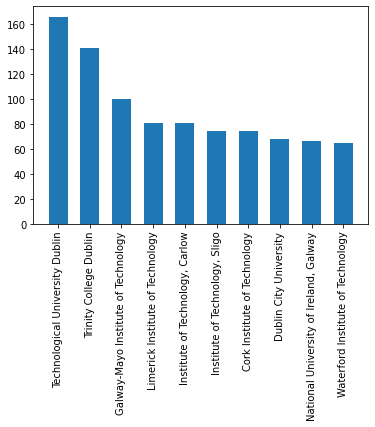

In [618]:
# Which college offer the most courses 2018-2020 top 10
Colcounts = AllCourses['College'].value_counts().head(10)
ColCat = Colcounts.index
plt.bar(ColCat, Colcounts, width=0.6,)
plt.xticks(range(len(ColCat)), ColCat, rotation='vertical')

A histogram displaying the Top 5 Courses Categories on offer to the students.

### Observation
- Arts
- Business and administration
- Information and Communication Technologies (ICTs)
- Health
- Engineering and engineering trades

([<matplotlib.axis.XTick at 0x1cbf7c9c580>,
 [Text(0, 0, 'Arts'),
  Text(1, 0, 'Business and administration'),
  Text(2, 0, 'Information and Communication Technologies (ICTs)'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'Engineering and engineering trades')])

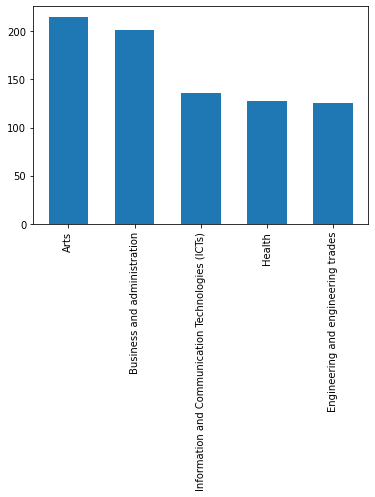

In [619]:
# Which Category of College courses are most on offered from 2018 - 2021 Top 5
Catcounts = AllCourses['Category'].value_counts().head(5)
CatCat = Catcounts.index
plt.bar(CatCat, Catcounts, width=0.6)
plt.xticks(range(len(CatCat)), CatCat, rotation='vertical')

### Top10College
Using the observations of Top 10 colleges above, a new Dataframe is created using the [isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) pandas function

In [620]:
Top10College =  ['Technological University Dublin',
'Trinity College Dublin',
'Galway-Mayo Institute of Technology',
'Limerick Institute of Technology',
'Institute of Technology, Carlow',
'Institute of Technology, Sligo',
'Cork Institute of Technology',
'Dublin City University',
'National University of Ireland, Galway',
'Waterford Institute of Technology',]

dfTop10College = AllCourses[AllCourses['College'].isin(Top10College)]

dfTop10College


,Title,College Code,College,Category,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
Code,,,,,,,,,,,,,,
CR001,Applied Physics and Instrumentation,CR,Cork Institute of Technology,Physical sciences,292.0,NaN,292.0,498.0,250.0,NaN,250.0,487.0,488.0,413.0
CR006,Applied Biosciences,CR,Cork Institute of Technology,Biological and related sciences,420.0,NaN,420.0,521.0,361.0,NaN,361.0,489.0,467.0,462.0
CR007,Analytical and Pharmaceutical Chemistry,CR,Cork Institute of Technology,Physical sciences,272.0,NaN,272.0,531.0,240.0,NaN,240.0,487.0,455.0,488.0
CR010,Agriculture (Year 1 - 2 days in Clonakilty Agr...,CR,Cork Institute of Technology,Agriculture,336.0,NaN,336.0,453.0,321.0,NaN,321.0,422.0,368.0,389.0
CR016,Software Development,CR,Cork Institute of Technology,Information and Communication Technologies (ICTs),351.0,NaN,351.0,445.0,307.0,NaN,307.0,413.0,393.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,WD,Waterford Institute of Technology,Information and Communication Technologies (ICTs),270.0,NaN,270.0,392.0,271.0,NaN,271.0,318.0,322.0,326.0
WD212,Recreation and Sport Management,WD,Waterford Institute of Technology,Personal services,262.0,NaN,262.0,304.0,270.0,NaN,270.0,349.0,311.0,338.0
WD230,Mechanical and Manufacturing Engineering,WD,Waterford Institute of Technology,Engineering and engineering trades,230.0,230.0,230.0,361.0,253.0,NaN,253.0,369.0,348.0,NaN


### Top5Category
Using the observations of Top 5 Course Categories above, a new Dataframe is created using the [isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) pandas function

In [621]:
Top5Category = ['Arts',
'Business and administration',
'Information and Communication Technologies (ICTs)',
'Health',
'Engineering and engineering trades']

dfTop5CatCol = dfTop10College[dfTop10College['Category'].isin(Top5Category)]

dfTop5CatCol

,Title,College Code,College,Category,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
Code,,,,,,,,,,,,,,
CR016,Software Development,CR,Cork Institute of Technology,Information and Communication Technologies (ICTs),351.0,NaN,351.0,445.0,307.0,NaN,307.0,413.0,393.0,362.0
CR021,Business (Common Entry),CR,Cork Institute of Technology,Business and administration,253.0,NaN,253.0,451.0,255.0,NaN,255.0,433.0,397.0,402.0
CR022,Business Administration,CR,Cork Institute of Technology,Business and administration,172.0,NaN,172.0,348.0,190.0,NaN,190.0,336.0,262.0,299.0
CR053,Interior Architecture,CR,Cork Institute of Technology,Arts,375.0,NaN,375.0,463.0,308.0,NaN,308.0,434.0,367.0,378.0
CR055,Environmental Engineering,CR,Cork Institute of Technology,Engineering and engineering trades,297.0,NaN,297.0,476.0,258.0,NaN,258.0,409.0,424.0,389.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD208,Manufacturing Engineering,WD,Waterford Institute of Technology,Engineering and engineering trades,317.0,NaN,317.0,368.0,188.0,NaN,188.0,339.0,330.0,298.0
WD210,Software Systems Development,WD,Waterford Institute of Technology,Information and Communication Technologies (ICTs),260.0,NaN,260.0,373.0,279.0,NaN,279.0,337.0,329.0,327.0
WD211,Creative Computing,WD,Waterford Institute of Technology,Information and Communication Technologies (ICTs),270.0,NaN,270.0,392.0,271.0,NaN,271.0,318.0,322.0,326.0


### Points400to600
Using the observations choosing courses between 400 and 600 points, a new Dataframe is created using the [between](https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html) pandas function.

In [622]:
Points400to600= dfTop5CatCol[dfTop5CatCol['21_R1 Points'].between(400, 600)]

Points400to600= Points400to600[Points400to600['20_R1 Points'].between(400, 600)]

Points400to600

,Title,College Code,College,Category,21_R1 Points,21_R2 Points,21_EOS,21_Mid,20_R1 Points,20_R2 Points,20_EOS,20_Mid,19_Mid,18_Mid
Code,,,,,,,,,,,,,,
CR105,Chemical and Biopharmaceutical Engineering,CR,Cork Institute of Technology,Engineering and engineering trades,443.0,NaN,443.0,532.0,443.0,NaN,443.0,532.0,498.0,510.0
CR106,Software Development,CR,Cork Institute of Technology,Information and Communication Technologies (ICTs),431.0,NaN,431.0,476.0,411.0,NaN,411.0,463.0,393.0,403.0
CR108,Mechanical Engineering,CR,Cork Institute of Technology,Engineering and engineering trades,434.0,NaN,434.0,509.0,434.0,NaN,434.0,509.0,487.0,490.0
CR130,Musical Theatre at CIT Cork School of Music,CR,Cork Institute of Technology,Arts,525.0,NaN,525.0,600.0,548.0,518.0,505.0,600.0,600.0,NaN
CR333,Nutrition and Health Science,CR,Cork Institute of Technology,Health,425.0,NaN,425.0,455.0,402.0,NaN,402.0,433.0,393.0,389.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TU904,Business and Law,TU,Technological University Dublin,Business and administration,462.0,NaN,462.0,486.0,462.0,NaN,462.0,487.0,NaN,NaN
TU910,Accounting,TU,Technological University Dublin,Business and administration,420.0,NaN,420.0,462.0,444.0,NaN,444.0,466.0,NaN,NaN
TU922,Marketing,TU,Technological University Dublin,Business and administration,412.0,NaN,412.0,446.0,418.0,NaN,418.0,443.0,NaN,NaN


## 3.4 Final Dataframe with Observations using Seaborn mobule

To complete the analysis of the refined CAO data the notebook is using Seaborn which is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics [16]. The following action are completed:

- Boxplot 2020 Round 1 Final Dataframe
- Boxplot 2021 Round 1 Final Dataframe
- Pair plot Mid 2018 - 2020 Final Dataframe


### Boxplot 2020 Round 1 Final Dataframe & 2021 Round 1 Final Dataframe

The boxplot for 2020/21 round 1 data point introduced the Interquartile range (IQR). The IQR describes the middle 50% of values when ordered from lowest to highest. To find the interquartile range (IQR), ​first find the median (middle value) of the lower and upper half of the data. These values are quartile 1 (Q1) and quartile 3 (Q3). The IQR is the difference between Q3 and Q1.

### Observation 2020/21 round 1

- Arts 
    - Increase of points required
- Business and administration
    - Increase of points required 
- Information and Communication Technologies (ICTs)
     - Heavily skewed to the right in 2021 compared to 2020
    - Increase of points required 
- Health
    - Increase of points required 
    - Skewed to the right in 2021 compared to 2020
- Engineering and engineering trades
    - Increase of points required 

<AxesSubplot:xlabel='20_R1 Points', ylabel='Category'>

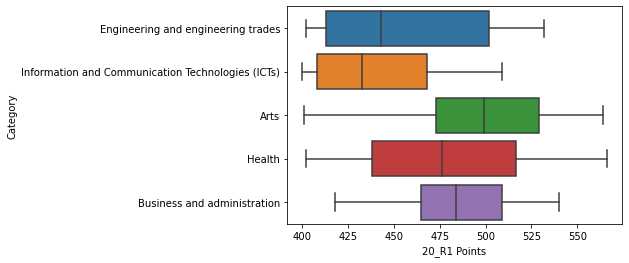

In [623]:
# Boxplot 2020 Round 1 Final Dataframe
sns.boxplot(y='Category', x='20_R1 Points', data=Points400to600)

<AxesSubplot:xlabel='21_R1 Points', ylabel='Category'>

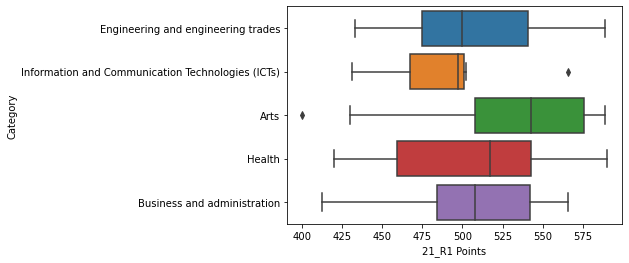

In [624]:
# Boxplot 2021 Round 1 Final Dataframe
sns.boxplot(y='Category', x='21_R1 Points', data=Points400to600)

### Pair plot Mid 2018 - 2020 Final Dataframe

A Pair Plots are a really simple (one-line-of-code simple!) way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data. It can also be a great jumping off point for determining types of regression analysis to use. [18]

### Observation Mid 2018 - 2020 Final Dataframe

This is the most interesting output as it uses the Midpoint, the points score of the applicant in the middle of a list of offerees placed in points score order [10]. Art has had a significant shift change from 2018/19 to 2020/21 for the score of the applicant in the middle of a list of offerees placed.

Text(0.5, 0.98, 'Pair Plot of CAO Points Top 5 course Top 10 colleges using Mid')

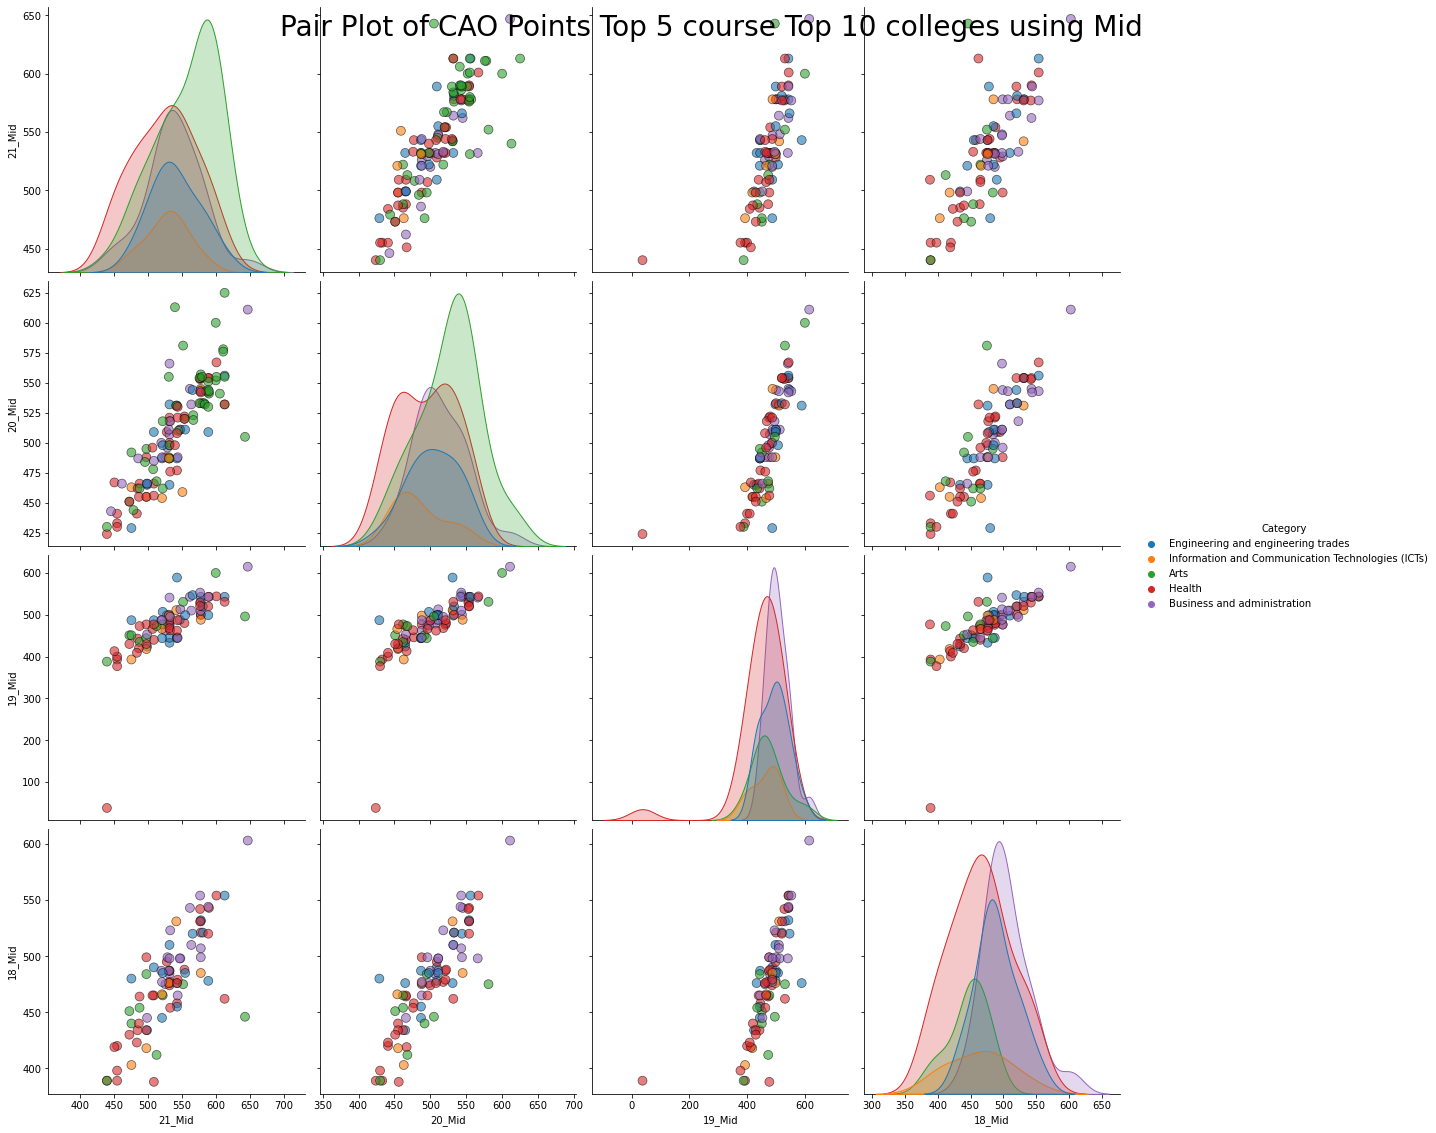

In [625]:
# Pair plot Mid 2018 - 2020 Final Dataframe

sns.pairplot(Points400to600, 
             vars = ['21_Mid','20_Mid','19_Mid','18_Mid'], 
             hue='Category', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);# Title 
plt.suptitle('Pair Plot of CAO Points Top 5 course Top 10 colleges using Mid', size = 28)

# 4. Reference

[1] https://pytutorial.com/check-url-is-reachable

[2] https://en.wikipedia.org/wiki/HTTP_404

[3] https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

[4] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

[5] https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f

[6] https://stackoverflow.com/questions/37826926/how-to-trim-starting-spaces-of-entire-column-in-libreoffice-or-google-sheets

[7] https://www.kite.com/python/answers/how-to-make-a-single-pandas-DataFrame-from-multiple-%60.csv%60-files-in-python

[8] https://pandas.pydata.org/pandas-docs/version/0.17.0/merging.html

[9] https://www.datasciencemadesimple.com/return-first-n-character-from-left-of-column-in-pandas-python/

[10] https://www.independent.ie/life/family/learning/understanding-your-cao-course-guide-26505318.html

[11] https://stackoverflow.com/questions/38277928/remove-special-characters-in-pandas-DataFrame

[12] http://www2.cao.ie/downloads/documents/Guidelines-EU-EFTA.pdf

[13] https://devenum.com/pandas-convert-multiple-columns-to-float/

[14] https://www.sharpsightlabs.com/blog/pandas-describe/

[15] https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/

[16] https://seaborn.pydata.org/

[17] https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/v/calculating-interquartile-range-iqr

[18] https://medium.com/@jaimejcheng/data-exploration-and-visualization-with-seaborn-pair-plots-40e6d3450f6d

# 5. End of file analysis

# 6. Other Learning outcomes

- 6.1 Pandas import on HTML Data
- 6.2 Pandas import on PDF Data
- 6.3 Zip files

# 6.1 Pandas import on HTML Data

During the assessment, the CAO 2021 point was only available via an HTML page, this was updated to Excel sheet. To illustrate a working knowledge of the HTML, a copy of the code is for reference below.

In [626]:
# Fetch the CAO points URL
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Check connection '<Response [200]>' means OK
resp

# Create a file path for the original data.
path = 'data/cao2021_' + nowstr + '.html'

### Error decoding data from the web

Technically, the server says we should decode as per:

- Content-Type: text/html; charset=iso-8859-1

On reviewing the data one line uses \x96 which isn't defined in iso-8859-1.

Therefore a similar decoding standard must be used Windows-1252 (also called CP1252), which is very similar but includes #x96.

https://www.i18nqa.com/debug/table-iso8859-1-vs-windows-1252.html

The character encodings ISO-8859-1, ISO-8859-15 and Windows-1252 are very similar and easily confused. This leads to several typical problems.

Typical Problems:
- Mislabeling text encoded in Windows-1252 as ISO-8859-1 and then converting from ISO-8859-1 to Unicode or other encodings causes the characters in the range 128-159 to be lost. They are converted as if they were control codes and typically display as white space, a specialized question mark, or a square showing the 4 hex digits of the code point. Using an ISO-8859-1 font that does not have the correct glyphs for the Windows-1252 characters will cause the characters to be displayed incorrectly.
- HTML and XML use Unicode code points as the values in Numeric Character References (NCR). Numeric Character References are character escapes written as &#dddd; or &#xhhhh; where the decimal or hexadecimal values are the Unicode code points. Because the first 256 characters in Unicode are identical to the characters in ISO-8859-1, people fall into the habit of using the character code point the are familiar with to create an NCR. However, for the characters in the range of 128-159 in Windows-1252, these are the wrong values. For example the Euro (€) is at code point 0x80 in Windows-1252, but in Unicode it is U+20AC. \&#x80; is the NCR for a control code and will not display as the Euro. The correct NCR is \&#x20AC;.


In [627]:
# The server uses the wrong encoding, fix it.
original_encoding = resp.encoding

# Change to cp1252.
resp.encoding = 'cp1252'

# Save the original html file.
with open(path, 'w') as f:
    f.write(resp.text)

### Use regular expressions

Regular expressions is used to select lines required for the 2021 CAO points DataFrame. 

### Online Web tools used

Test regex on 
https://pythex.org/

Compare output of files using notepad ++ plugin
http://www.technicaloverload.com/compare-two-files-using-notepad/

In [628]:
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

# The file path for the csv file.
path = 'data/cao2021_csv_' + nowstr + '.csv'

# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path, 'w') as f:
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57]
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


# 6.2 Pandas import on PDF Data

## Read pdf with tabula-py CAO points 2019 level 8

The assessment was to look at importing data via the tabula module. This method was tried and caused an error with the 2019 data specifically with lvl8_19.pdf on Page 16 and caused an error splitting the page into 3 separate tables. This caused an error when merging pandas data frame and the choice of losing 52 rows of valid data. To illustrate a working knowledge of reading a PDF, a copy of the code is for reference below.

Data copied from pdf to excel = 930 rows × 4 columns
Data imported via tabula-py = 965 rows × 4 columns

In [629]:
# Save file path for the orginal data
path = 'data/cao2019_' + nowstr + '.pdf'

# get data from cao and save to path
urlrq.urlretrieve('http://www2.cao.ie/points/lvl8_19.pdf', path)

# Download and parse the pdf with tabula module
# 
# import module tabula
# Documentation
# https://pypi.org/project/tabula-py/
df = tb.read_pdf('http://www2.cao.ie/points/lvl8_19.pdf', pages='all')
df

[   Course Code                             INSTITUTION and COURSE   EOS    Mid
 0          NaN                    Athlone Institute of Technology   NaN    NaN
 1        AL801    Software Design with Virtual Reality and Gaming   304  328.0
 2        AL802               Software Design with Cloud Computing   301  306.0
 3        AL803  Software Design with Mobile Apps and Connected...   309  337.0
 4        AL805        Network Management and Cloud Infrastructure   329  442.0
 5        AL810                                 Quantity Surveying   307  349.0
 6        AL820                 Mechanical and Polymer Engineering   300  358.0
 7        AL830                                    General Nursing   410  429.0
 8        AL832                                Psychiatric Nursing   387  403.0
 9        AL836                       Nutrition and Health Science   352  383.0
 10       AL837            Sports Science with Exercise Physiology   351  392.0
 11       AL838                         

In [630]:
# Create csv path
csvpath = 'data/cao2019_' + nowstr + '.csv'

# Convert pdf to csv
tb.convert_into( path , csvpath, output_format="csv", pages='all')

# Read csv as a pandas DataFrame
df2019 = pd.read_csv(csvpath, sep=',')

df2019

,Course Code,INSTITUTION and COURSE,EOS,Mid
0,NaN,Athlone Institute of Technology,NaN,NaN
1,AL801,Software Design with Virtual Reality and Gaming,304,328
2,AL802,Software Design with Cloud Computing,301,306
3,AL803,Software Design with Mobile Apps and Connected...,309,337
4,AL805,Network Management and Cloud Infrastructure,329,442
...,...,...,...,...
960,WD200,Arts (options),221,296
961,WD210,Software Systems Development,271,329
962,WD211,Creative Computing,275,322
963,WD212,Recreation and Sport Management,274,311


In [631]:
# All row with colleges have NAN 
# Find all rows that have NAN as a value
# https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

# creating bool series True for NaN values 
bool_series = pd.isnull(df2019["Course Code"]) 
    
# filtering data 
# displaying data only with Course Code = NaN 
df2019[bool_series]

,Course Code,INSTITUTION and COURSE,EOS,Mid
0,NaN,Athlone Institute of Technology,NaN,NaN
28,NaN,"Institute of Technology, Carlow",NaN,NaN
62,NaN,"Carlow College, St. Patrick`s",NaN,NaN
66,NaN,Cork Institute of Technology,NaN,NaN
110,NaN,University College Cork (NUI),NaN,NaN
173,NaN,American College,NaN,NaN
176,NaN,CCT College Dublin,NaN,NaN
178,NaN,Marino Institute of Education,NaN,NaN
185,NaN,Dublin Business School,NaN,NaN
209,NaN,Dublin City University,NaN,NaN


# 6.3 Zip files

### ZIP clean up data folder

https://thispointer.com/python-how-to-create-a-zip-archive-from-multiple-files-or-directory/
https://www.geeksforgeeks.org/working-zip-files-python/

In [632]:
# path = 'data/' 
# zipfile = 'data/' + nowstr + '_zip_data_.zip'

# create a ZipFile object
#with ZipFile(zipfile, 'w') as zip:
   # Iterate over all the files in directory
   # for filenames in path:
       # if filenames.endswith('.zip'):
           # print('miss')
    # else:
           # zip.write(filename)


       